# Examen Final 
Indicaciones

- **Subir su Jupyter Notebook a esta carpeta**
- **Tienen desde las 15:00 hasta las 18:00 horas, pasado este horario su nota es cero.**

In [1]:
# María Fernanda Carrillo (20201596)

In [ ]:
pip install causalgraphicalmodels
pip install linearmodels

from causalgraphicalmodels import CausalGraphicalModel
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

## 1. (3 puntos) Instrumental Variables (IV)
Suponga que estamos interesados en estudiar la relación entre educación (X) y el nivel de ingresos (Y).
Un investigador propone utilizar como variable instrumental (Z) el número de horas que una persona utilizó para ver televisión cuando era niño. 

- Identifique todos los elementos necesarios para implementar un enfoque de IV en este ejemplo.
 
    En este caso es que la relación entre educación, nivel de ingresos y el número de horas que una persona utilizó para ver televisión cuando era niño constituyen variables. No obstante es que no siguen una distribución lineal, es decir una en la cual todas se influyan mutuamente por igual, sino que en este caso es la variable instrumental (Z), las horas de televisión en la infancia la cual se aparta de la influencia retroactiva entre el resto de variables. Y la variable W finalmente sería el resultado del estudio. 
 
 
- Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones

In [60]:
iv = CausalGraphicalModel(nodes = ["Y","X","W","Z"],
                          edges = [("Y","X"),
                                   ("X","W"),
                                  ("Z","X"),
                                  ("Z","W")])
iv = iv.do('Y')
iv.draw()

NameError: name 'CausalGraphicalModel' is not defined

Así es que finalmente podemos observar que al ser una variable instrumental es que al afectar a la educación qe haya recibido (incluyendo en la infancia, ahí encontrandose un vínculo) es que podemos observar que finalmente afecta al resultado de la relación entre educación (X) e ingresos (Y). Y, si bien esta se quiere retirar por considerarse que no afecta lo suficiente, perfectamente se puede realizar, no obstante siempre y cuando se mantenga relacionada con X es que infuirá en el resultado final.

- ¿El efecto de la educación sobre el nivel de ingresos es positivo o negativo? Argumente si los resultados serian causales o solamente de correlación
En este caso es que siempre y cuando se tome en cuenta a la variable Z (el tiempo dedicado a la televisión en la infancia) puede llegarse perfectamente a considerar como una variable correcionable. Ello en tanto el tiempo que se dedicó a esa actividad de recreación se trata de tiempo que el individuo no estudió. Por ser la infancia un período fundamental en el cual las bases de la educación entera se basan entonces constituye una variable que de hecho tiene injerencia indirecta con su educación y, consecuentemente en este modelo, con el nivel de ingresos al que haya podido acceder posteriormente basado en su nivel de estudios. 

## 2. (3 puntos) Regression Discontinuity Design (RDD)
Supongamos que estamos estudiando la eficacia de un programa de becas creado por el gobierno peruano sobre las notas de los alumnos al final del primer semestre en la universidad. PRONABEC ha decidido que entregará becas a aquellos postulantes que tengan un promedio superior durante la secundaria igual a 16.

- Identifique todos los elementos necesarios para implementar un RDD en este ejemplo.

    Los elementos que en este caso son tomados en cuenta son los siguientes:

    * Variable de ejecución (X): como la que determina si se recibe la beca o no, en este caso es el promedio durante la secundaria
    * 'Cutoff'(C0): el límite el cual termine si se recibe el tratamiento o no, el cual es representado en este caso por el valor de 16. 
    * Ancho de banda (h): el tamaño del área alrededor del límite que se está dispuesto a encontrar comparable; en el caso propuesto no se da ningún valor referente a este, pero en tanto se quiere comparar la eficacia del programa de becas es que se puede tratar a los dos grupos por completo, por lo que el ancho sería de 0 a 20. O menor, en caso se quiera equiparar la cantidad de personas en ambos grupos.
    * Tratamiento (D): en este caso si el si se recibe la beca o no.


-	Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.
    
    En este caso es que como sabemos es que el punto de corte está representado por el 16, en tanto es el criterio para entregar las becas. Por lo cual se aplica un diseño de regresión discontinua por querer evaluar la eficacia. No obstante es que dentro de este modelo que encontramos dos tipos de diseños: el 'fuzzy' y el 'sharp'. Pero en tanto en este modelo es que solo se hace mención de una variable y el caso parece representarlo como determinístico. O sí o no, simplemente.

    Ello se puede ver reflejado en la ecuación del diseño 'sharp' representado como:

$$
D_i =
   \begin{cases} 1
       \text{si} & X_i\geq{c_0}
       \\ 0
       \text{ if } & X_i < c_0
   \end{cases}
$$

    Siendo que en el caso presente sería: 

$$
Beca =
   \begin{cases} La\ recibe \ 
       \text{si} & X_i\geq{16}
       \\ No \ la \ recibe
       \text{ si } & X_i < 16
   \end{cases}
$$


-	¿El efecto de la política sobre el rendimiento de los estudiantes sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación.
    
        En efecto es que la entrega de la beca impactaría positivamente en los estudiantes. Ello pues debido a que una beca implica el poder despreocuparse en cierta medida por la economía o fuentes de ingreso que pueden, en lugar de la educación, el ser invertidas en otras cosas que surtan mejor provecho e incluso incrementen la productividad del estudiante. Asimismo es que por ese beneficio bueno, obviamente genera que el estudiante se esfuerce más para no perderlo y así siga mejorando sus notas, teniendo un efecto positivo. El cual en este caso sería causal, pues es gracias a la beca que en efecto los estudiantes pueden rendir mejor y ello genera beneficios al estado, quien las financia y retribuye finalmente de profesionales capacitados.

## 3. (3 puntos) Difference in Difference (DiD)
Supongamos que estamos interesados en estudiar el impacto de la migración en la tasa de empleo en dos regiones del Perú en 2017-2018. Tenemos datos anuales sobre la tasa de empleo en Lima, que experimentó una afluencia significativa de inmigrantes en 2018, y Puno que no experimentó el ingreso de migrantes (2017 ninguna de las regiones experimentó afluencia de migrantes). Podemos usar un análisis DID para comparar el cambio en las tasas de empleo entre las dos regiones a lo largo del tiempo para ver si la migración tuvo algún efecto.

-	Identifique todos los elementos necesarios para implementar un DiD en este ejemplo.

    La Diferencia en Diferencia (o DiD en inglés) es una herramienta para poder estimar los efectos mediante una comparación de los efectos entre las diferencias del pre- y post-tratamiento luego de aplicado dicho tratamiento en un grupo y dejar un grupo control libre de ese. 
    Así es que los elementos que intervienen son: 
    * Tratamiento (D): en este caso la afluencia significativa de inmigrantes en el año 2018
    * El 'outcome' (Y): lo que nos interesa en este caso es la tasa de empleo y cuánto es que fluctuó tras la llegada (o no) de inmigrantes.
    * El grupo tratamiento (k): en este caso Lima, pues recibió una gran afluencia de inmigrantes
    * El grupo control (U): Puno en esta ocasión, en tanto no recibió ingreso de migrantes.


-	Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.
   
    Así pues es que podemos realizar el cálculo correspondiente, pues es que ya tenemos en cuenta todas las variables y los datos que generan diferencias con el fin de averiguar si, en efecto, fue el influjo de inmigrantes lo que generó un impacto en la tasa de empleo. Utilizando nada más un diseño 2x2, pues solo son 2 grupos. Y donde $\hat\delta_{kU}$ es el ATT (Average Treatment Effect on Treated) del grupo $k$ (grupo tratamiento), y $\tilde y$ es la media de muestra de ese grupo particular en ese periodo específico de tiempo, es decir en este caso, la tasa de de empleo durante el período 2017-18'.

    La ecuación como:
$$
\widehat{\delta}^{2\times 2}_{kU} = \bigg ( \overline{y}_k^{-post(k)} - \overline{y}_k^{-pre(k)} \bigg ) - \bigg ( \overline{y}_U^{-post(k)} - \overline{y}_U^{-pre(k)} \bigg )
$$    
    Y en el ejemplo como: 
$$
{Impacto \ de \ la \ migración \ en \ la \ tasa \ de \ empleo} = \bigg ( \overline{tasa de empleo Lima}^{-post(migración)} - \overline{tasa de empleo Lima}^{-pre(migración)} \bigg ) - \bigg ( \overline{tasa de empleo Puno}^{-post(migración)} - \overline{tasa de empleo Puno}^{-pre(migración)} \bigg )
$$  
 

-	¿El efecto de la migración sobre la tasa de empleo sería positivo o negativo (solo necesitan usar su intuición)? Argumente si los resultados serian causales o solamente de correlación.

    En este caso es que, debido al alto influjo de inmigrantes, se deduciría que si se cuenta con un número limitado de trabajo y que llega mucha fuerza de trabajo entonces la tasa de empleo disminuiría sustancialmente y sería, en lugar de ello, la tasa de desemplo la que aumente. Teniendo así un efecto de tipo causal. No obstante es que realistamente depende mucho del contexto y, sobre todo, en un país como Perú, a la empleabilidad del trabajo informal, que no es contabilizada pero es fuerte y constituye más del 50% de personas activamente económicamente. 

## 4. (3 puntos) Lecturas
- [Bell, A., Chetty, R., Jaravel, X., Petkova, N., & Van Reenen, J. (2019). Who becomes an inventor in America? The importance of exposure to innovation. The Quarterly Journal of Economics, 134(2), 647-713.](https://www.nber.org/system/files/working_papers/w24062/w24062.pdf),  ¿Cuáles son las debilidades del enfoque del paper para responder su pregunta de investigación?

     La pregunta de investigación la cual el ‘paper’ busca responder refiere a los factores que influyen en la motivación de un infante para perseguir la invención como una carrera profesional. Así analizando muchos de las variables del contexto en el cual se desenvuelven los niños con altas probabilidades de convertirse en futuros inventores.
     
     Por un lado, es que la debilidad más notoria del artículo es que se centra sobre todo en factores más del entorno; sin embargo, ignorando la propia psique o interés provisto por los niños en seguir tales carreras. Ya que si bien los factores estudiados representan muchas veces las diferencias reales y que dictaminan el futuro de estos infantes en tanto si tienen la oportunidad o no de poder seguir la carrera en caso lo deseen. Es que no se toman en cuenta factores más psicológicos y si de estos niños realmente quieren seguir una carrera o es que si a pesar de que les fue brindada esta oportunidad prefieren seguir otros horizontes: solo porque tengan aptitudes para esa línea de carrera no implica automáticamente que tengan un interés.  Asimismo, bajo este mismo criterio es que se debería evaluar el recorrido que estos infantes tienen intelectualmente, puesto que, si bien toma en cuenta los valores referidos a los puntajes de matemática en 4to grado, parece ser una edad muy baja la cual solo es seleccionada por el ‘likeliness’ de demostrar inteligencia. Una base de datos la cual siga a estos mismos niños a lo largo de la secundaria podría arrojar datos más concretos. Es considerable además que cuando se hace la elección de carrera, muchas veces son las experiencias más recientes o el estilo de vida que ha estado llevando lo que impacta más a ese joven adulto, por lo general, a punto de ingresar a la universidad. Y lo que finalmente empuja al adolescente en una carrera de su agrado (idealmente). 
     
     Y si bien es que se puede alegar que su tamaño de muestra es algo reducido considerando lo vasto que es el país norteamericano. Así como el hecho referido a que se puede ver en el estudio un cierto sesgo existente con la ciudad de Nueva York. Por lo cual sería importante el poder extrapolarlo al país entero o a un país con un sistema y campo laboral para esta área. Ya que no es muy viable la comparación con otros países, ello no debido a una debilidad propia del estudio per se, sino que el sistema de invención o desarrollo de tecnología es muy escaso o débil en otras zonas del mundo.  
     
     No obstante, reconoce su propia limitación y deja en claro de que no propone legislación o política alguna con el fin de cambiar el contexto actual, visible en sus conclusiones, las cuales en efecto manifiestan una diferencia en las oportunidades y el éxito de la carrera dependiendo de su situación familiar; aunque sí sienta un buen punto de partida al exponer cuáles son los catalizadores de la diferencia en el perseguir una carrera en invención.



- [Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903](https://scholar.harvard.edu/files/dell/files/ecta8121_0.pdf), ¿Cuáles serían dos próximos pasos específicos para avanzar en su pregunta de investigación? 
    
    La pregunta de investigación a la cual el autor refiere es al examinar el impacto a largo plazo de la ‘mita’, el sistema de trabajo forzoso en minas, vigente en los países de Perú y Bolivia entre 1573 y 1812. Como bien es que concluye del estudio es que, en efecto, la explotación de un sistema milenario propia de la época colonial provoca consecuencias que se ven hasta el día de hoy, más de 200 años luego de que haya cesado. Por ello es que un primer paso para correctamente poder calcular el daño que supuso a la sociedad peruana (y boliviana si cabe la posibilidad como lo hizo este estudio, también debido a la geografía propia del virreinato que asimismo abarcaba a Bolivia), es que podemos identificar cuáles son las esferas en las cuales las instituciones coloniales han frenado el desarrollo local de muchas comunidades presas de la explotación. Pues al menos una de los aspectos más tangibles de este perjuicio es la economía de estas comunidades, y, que por el continuo y obligatorio trabajo en las minas es que actualmente se encuentran dependiendo de ellas para poder subsistir. 

    De la misma manera es que se puede estudiar mucho más a profundidad este fenómeno contando con las herramientas adecuadas. Ello en tanto no se contaba con los datos referidos a los flujos económicos dentro de esos espacios geográficos, por lo cual para poder reforzar la hipótesis es que se puede buscar o tratar de completar adecuadamente estos datos instando a los gobiernos regionales a recolectarlos. Asimismo, es que para poder dejar en claro que esta no se trata de una teoría, es que se puede comenzar a tratar de estudiar el fenómeno en toda la zona latinoamericana, en tanto esta también ha estado históricamente bajo dominio colonial. Así viendo si en efecto trata de un fenómeno regional, si es que solo se debió al sistema de la ‘mita’ o si fueron condiciones propias del virreinato español, al menos en un inicio, o la inestabilidad política propia de nuestro país lo que propició y marcó, sobre todo, hasta la actualidad a esas comunidades que la sufrieron mucho más que las instituciones coloniales.  

    Para poder avanzar aún más en la pregunta de investigación es que hemos de guiarnos por la misma recomendación de la autora, la cual habla de que hemos de realizar más estudios de modelos generales de evolución institucional basados en investigaciones empíricos que demuestren y hagan visibles los cambios a partir de fuerzas externas. Así es que podremos encontrar muchos más problemas actuales con gran repercusión en la escena política actual y sus vínculos con fenómenos antiguos de los cuales no tengamos conocimiento. En tanto descubramos cuáles son las causas reales de estos perjuicios o daños en comunidades o grupos es que podremos buscar soluciones más efectivas que otras propuestas que remedien superficialmente el problema. 

    Asimismo, es que este, en tanto el efecto de la mita en comunidades sobre todo marginalizadas de por sí por la lejanía geográfica es una cuestión que afecta tangiblemente a sectores de la población que aún en día existen es que se debería tratar de realizar un esfuerzo para la transición de estos sistemas a unos más modernos que eleven su calidad de vida y despojen de los vestigios negativos que dejó la herencia colonial.

## 5. (4 puntos) Código

### Ploteo de Histogramas

Tienen que trabajar con la misma data de educacion que utilicé en la clase_11. En este documento encontrarán una descripción detallada de todas las variables en el dataset.


Tomando en cuenta que la variable nearc2 representa si existe un college en el county debe realizar los siguientes ploteos de histogramas.

In [42]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


- Grafique dos histogramas para la variable años de educación educ para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.

In [43]:
card_0 = card[card.nearc2 == 0]
card_1 = card[card.nearc2 == 1]

<AxesSubplot:xlabel='educ', ylabel='Count'>

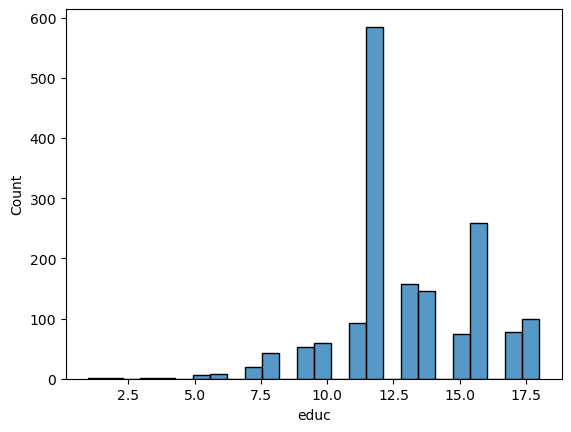

In [57]:
sns.histplot(data=card_0, x="educ")

<AxesSubplot:xlabel='educ', ylabel='Count'>

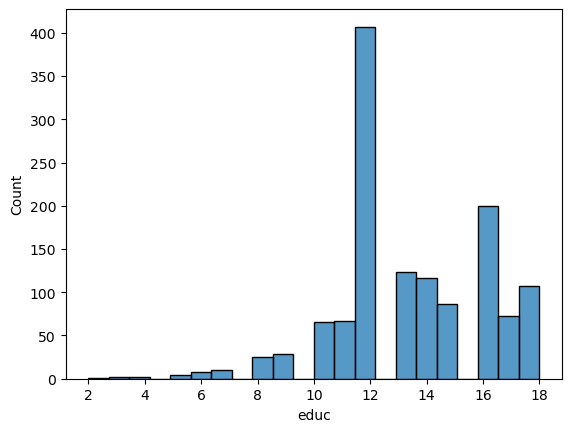

In [45]:
Esns.histplot(data=card_1, x="educ")

Observando las distribuciones de ambos histogramas es que a primera vista no observamos una diferencia palpable dentro del tener una universidad o no dentro del condado. Ya que tiene una distribución similar, en tanto aproximadamente son los 12 años de educación donde se tiene una media; no obstante es que observando a la cantidad es que encontramos cerca de 200 personas inclinada a favor del condado donde hay universidad. Asimismo es que notamos que sigue una distribución similar, hay una diferencia luego de los 15 años, pues en efecto hay mayor educación en los lugares donde no hay universidad, pero no es tan exponencial, aunque sí bastante reveladora.

- Grafique dos histogramas para la variable logaritmos de los ingresos lwage para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.

<AxesSubplot:xlabel='lwage', ylabel='Count'>

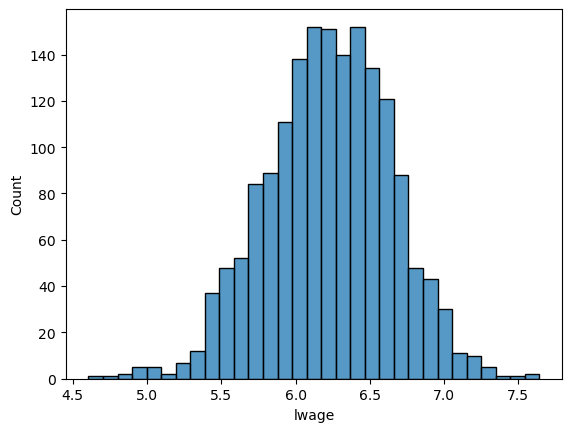

In [46]:
sns.histplot(data=card_0, x="lwage")

<AxesSubplot:xlabel='lwage', ylabel='Count'>

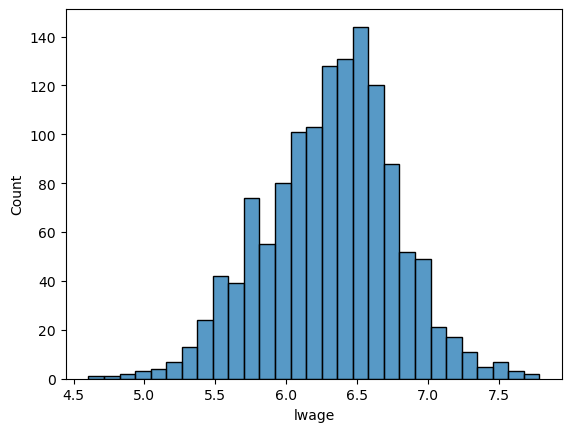

In [47]:
sns.histplot(data=card_1, x="lwage")

En es este gráfico donde podemos observar que de hecho existe una diferencia más tangible respecto a la distribución de ingresos, ya que la distribución de los condados donde no hay una universidad siguen una distribución asimétrica, tirando para el lado derecho. Sin embargo en donde sí hay universidad se encuentra una distribución más simétrica y elevada, por sobre todo del rango de entre a 5.8 a 6.8 aproximadamente, donde hay una gran cantidad de personas que de hecho exceden el máximo del county donde sí hay college. 

### Regresiones

- Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.

In [27]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.97e-232
Time:                        16:38:26   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2. Compare los resultados encontrados usando IV2SLS con la primera regresión. ¿Cambió el coeficiente relacionado a educ , por qué?

In [34]:
#2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2 ]", card).fit()
iv_reg.summary

NameError: name 'IV2SLS' is not defined

Se puede apreciar como de hecho sí hubo un cambio dentro de los resultados. El coeficiente relacionado a educ en la primera regresión salía 0.0712 mientras en esta segunda regresión resultó 0.3618. Este considerablemente incremento se debe a la instrumentalización de la variable educación con la referente a la de si existe una universidad en el county. No obstante algo a destacar es que la primera regresión arrojaba un p-value de 1.97e-232, sustancialmente menor a 0.05 y por tanto válido; sin embargo este segundo modelo arroja 0.0000, invalidando en cierta medida el resultado.